# Tensorflow implementation of Q learing

__Mount to google drive for code base__

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


__Set system path to code base path__

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Gomoku_RL')

__Two game player compete with each other__

In [0]:
from GomokuBoard import GomokuBoard
from GameController import battle
from GamePlayerInterface import GamePlayerInterface
from TensorFlowController import TFSessionManager
import tensorflow as tf

def evaluate_players(p1 : GamePlayerInterface, p2 : GamePlayerInterface, games_per_battle = 100, num_battles = 100):
    board = GomokuBoard()

    p1_wins = []
    p2_wins = []
    draws = []
    game_number = []
    game_counter = 0

    TFSessionManager.set_session(tf.Session())
    TFSessionManager.get_session().run(tf.global_variables_initializer())

    for i in range (num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, False)
        p1_wins.append(p1win)
        p2_wins.append(p2win)
        draws.append(draw)
        game_counter=game_counter+1
        game_number.append(game_counter)

    TFSessionManager.set_session(None)
    return game_number, p1_wins, p2_wins, draws


__Neural Network player vs Random GamePlayerInterface(Neural Network player go first)__



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

After 100 game we have draws: 5, GamePlayerInterface 1 wins: 57, and GamePlayerInterface 2 wins: 38.
Which gives percentages of draws: 5.00%, GamePlayerInterface 1 wins: 57.00%, and GamePlayerInterface 2 wins:  38.00%
After 100 game we have draws: 12, GamePlayerInterface 1 wins: 83, and GamePlayerInterface 2 wins: 5.
Which gives percentages of draws: 12.00%, GamePlayerInterface 1 wins: 83.00%, and GamePla

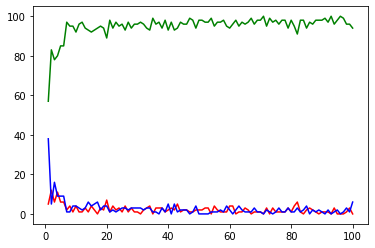

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
from RandomPlayer import RandomPlayer
from QlearningNetworkPlayer import NNQPlayer

tf.reset_default_graph()    

nnplayer = NNQPlayer("QLearner1")
rndplayer = RandomPlayer()

game_number, p1_wins, p2_wins, draws = evaluate_players(nnplayer, rndplayer)

p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

__Neural network player vs Random GamePlayerInterface(Random GamePlayerInterface go first)__

After 100 game we have draws: 14, GamePlayerInterface 1 wins: 59, and GamePlayerInterface 2 wins: 27.
Which gives percentages of draws: 14.00%, GamePlayerInterface 1 wins: 59.00%, and GamePlayerInterface 2 wins:  27.00%
After 100 game we have draws: 10, GamePlayerInterface 1 wins: 57, and GamePlayerInterface 2 wins: 33.
Which gives percentages of draws: 10.00%, GamePlayerInterface 1 wins: 57.00%, and GamePlayerInterface 2 wins:  33.00%
After 100 game we have draws: 14, GamePlayerInterface 1 wins: 41, and GamePlayerInterface 2 wins: 45.
Which gives percentages of draws: 14.00%, GamePlayerInterface 1 wins: 41.00%, and GamePlayerInterface 2 wins:  45.00%
After 100 game we have draws: 11, GamePlayerInterface 1 wins: 38, and GamePlayerInterface 2 wins: 51.
Which gives percentages of draws: 11.00%, GamePlayerInterface 1 wins: 38.00%, and GamePlayerInterface 2 wins:  51.00%
After 100 game we have draws: 12, GamePlayerInterface 1 wins: 39, and GamePlayerInterface 2 wins: 49.
Which gives percen

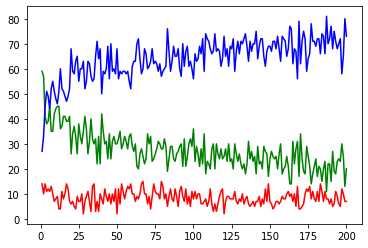

In [0]:
tf.reset_default_graph()    

nnplayer = NNQPlayer("QLearner1")
rndplayer = RandomPlayer()

game_number, p1_wins, p2_wins, draws = evaluate_players(rndplayer, nnplayer, num_battles=200)

p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

__Neural network player vs Min Max GamePlayerInterface(Neural network player go first)__

After 100 game we have draws: 0, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 100.
Which gives percentages of draws: 0.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  100.00%
After 100 game we have draws: 58, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 42.
Which gives percentages of draws: 58.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  42.00%
After 100 game we have draws: 10, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 90.
Which gives percentages of draws: 10.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  90.00%
After 100 game we have draws: 0, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 100.
Which gives percentages of draws: 0.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  100.00%
After 100 game we have draws: 0, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 100.
Which gives percentages of 

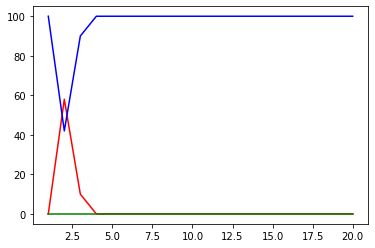

In [0]:
from MinMaxAlgorithm import MinMaxAlgorithm

tf.reset_default_graph()    

nnplayer = NNQPlayer("QLearner1")
mm_player = MinMaxAlgorithm()

game_number, p1_wins, p2_wins, draws = evaluate_players(nnplayer, mm_player, num_battles = 20)

p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

__Neural network player vs Min Max GamePlayerInterface(Min Max GamePlayerInterface go first)__

After 100 game we have draws: 13, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 87.
Which gives percentages of draws: 13.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  87.00%
After 100 game we have draws: 80, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 20.
Which gives percentages of draws: 80.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  20.00%
After 100 game we have draws: 91, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 9.
Which gives percentages of draws: 91.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  9.00%
After 100 game we have draws: 100, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 0.
Which gives percentages of draws: 100.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  0.00%
After 100 game we have draws: 100, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 0.
Which gives percentages of dr

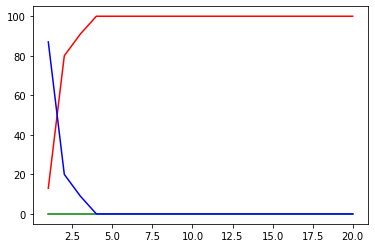

In [0]:
tf.reset_default_graph()    

nnplayer = NNQPlayer("QLearner1")
mm_player = MinMaxAlgorithm()

game_number, p1_wins, p2_wins, draws = evaluate_players(nnplayer, mm_player, num_battles = 20)

p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

__Neural network player vs Min Max Random GamePlayerInterface(Neural network player go first)__

After 100 game we have draws: 49, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 51.
Which gives percentages of draws: 49.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  51.00%
After 100 game we have draws: 26, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 74.
Which gives percentages of draws: 26.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  74.00%
After 100 game we have draws: 21, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 79.
Which gives percentages of draws: 21.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  79.00%
After 100 game we have draws: 4, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 96.
Which gives percentages of draws: 4.00%, GamePlayerInterface 1 wins: 0.00%, and GamePlayerInterface 2 wins:  96.00%
After 100 game we have draws: 0, GamePlayerInterface 1 wins: 0, and GamePlayerInterface 2 wins: 100.
Which gives percentages of dr

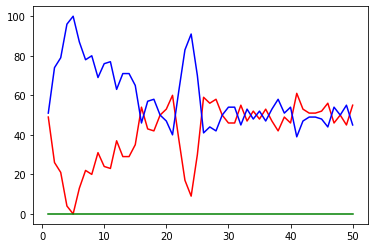

In [0]:
from MinMaxRandomAlgorithm import MinMaxRandomAlgorithm

tf.reset_default_graph()    

nnplayer = NNQPlayer("QLearner1")
rnd_mm_player = MinMaxRandomAlgorithm()

game_number, p1_wins, p2_wins, draws = evaluate_players(nnplayer, rnd_mm_player, num_battles = 50)

p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

__Neural network player vs Min Max Random GamePlayerInterface(Min Max Random player go first)__

After 100 game we have draws: 1, GamePlayerInterface 1 wins: 99, and GamePlayerInterface 2 wins: 0.
Which gives percentages of draws: 1.00%, GamePlayerInterface 1 wins: 99.00%, and GamePlayerInterface 2 wins:  0.00%
After 100 game we have draws: 4, GamePlayerInterface 1 wins: 96, and GamePlayerInterface 2 wins: 0.
Which gives percentages of draws: 4.00%, GamePlayerInterface 1 wins: 96.00%, and GamePlayerInterface 2 wins:  0.00%
After 100 game we have draws: 1, GamePlayerInterface 1 wins: 99, and GamePlayerInterface 2 wins: 0.
Which gives percentages of draws: 1.00%, GamePlayerInterface 1 wins: 99.00%, and GamePlayerInterface 2 wins:  0.00%
After 100 game we have draws: 1, GamePlayerInterface 1 wins: 99, and GamePlayerInterface 2 wins: 0.
Which gives percentages of draws: 1.00%, GamePlayerInterface 1 wins: 99.00%, and GamePlayerInterface 2 wins:  0.00%
After 100 game we have draws: 8, GamePlayerInterface 1 wins: 92, and GamePlayerInterface 2 wins: 0.
Which gives percentages of draws: 8.

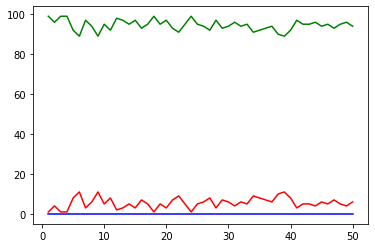

In [0]:
tf.reset_default_graph()    

nnplayer = NNQPlayer("QLearner1")
rnd_mm_player = MinMaxRandomAlgorithm()

game_number, p1_wins, p2_wins, draws = evaluate_players(rnd_mm_player, nnplayer, num_battles = 50)

p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

After all combination of the game battle between different algorithm, Neutral network overall performance is good but still have some space to imporve. We can try to build more deep network model to make the perfomance better.